In [23]:
from ultralytics import YOLO
import cv2
import supervision as sv
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("test-images/test-image.png")

In [4]:
model = YOLO("models/garbage_obj_det.pt")

In [5]:
results = model(img)


0: 480x640 3 CARDBOARDs, 4 PLASTICs, 51.5ms
Speed: 5.2ms preprocess, 51.5ms inference, 101.8ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
model.names

{0: 'BIODEGRADABLE',
 1: 'CARDBOARD',
 2: 'GLASS',
 3: 'METAL',
 4: 'PAPER',
 5: 'PLASTIC'}

In [8]:
results[0].boxes.cls

tensor([1., 5., 5., 5., 1., 5., 1.], device='cuda:0')

In [28]:
label_mapping = dict()
label_mapping[0] = "ORGANIK (Sampah Mudah Terurai)"
label_mapping[1] = "KERTAS (Sampah Daur Ulang - Kertas)"
label_mapping[2] = "LAINNYA (Sampah Residu)"
label_mapping[3] = "LAINNYA (Sampah Residu)"
label_mapping[4] = "KERTAS (Sampah Daur Ulang - Kertas)"
label_mapping[5] = "PLASTIK (Sampah Daur Ulang - Plastik)"

In [ ]:
♳ PLASTIK (Sampah Daur Ulang - Plastik)
📄 KERTAS (Sampah Daur Ulang - Kertas)
🗑 LAINNYA (Sampah Residu)
♻ ORGANIK (Sampah Mudah Terurai)

In [21]:
labels = []
for classes in results[0].boxes.cls:
    print(int(classes.cpu().numpy()))
    class_int = int(classes.cpu().numpy())
    print(model.names[class_int])
    label = label_mapping[class_int]
    labels.append(label)
    print(label)

1
CARDBOARD
📄 KERTAS (Sampah Daur Ulang - Kertas)
5
PLASTIC
♳ PLASTIK (Sampah Daur Ulang - Plastik)
5
PLASTIC
♳ PLASTIK (Sampah Daur Ulang - Plastik)
5
PLASTIC
♳ PLASTIK (Sampah Daur Ulang - Plastik)
1
CARDBOARD
📄 KERTAS (Sampah Daur Ulang - Kertas)
5
PLASTIC
♳ PLASTIK (Sampah Daur Ulang - Plastik)
1
CARDBOARD
📄 KERTAS (Sampah Daur Ulang - Kertas)


In [19]:
bbox_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)

In [20]:
detections = sv.Detections.from_ultralytics(results[0])

In [24]:
annotated_frame = bbox_annotator.annotate(
    scene=img.copy(),
    detections=detections)

label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame.copy(),
    detections=detections, 
    labels=labels
    )

In [26]:
annotated_frame = bbox_annotator.annotate(
    scene=img.copy(),
    detections=detections)

label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame.copy(),
    detections=detections
    )

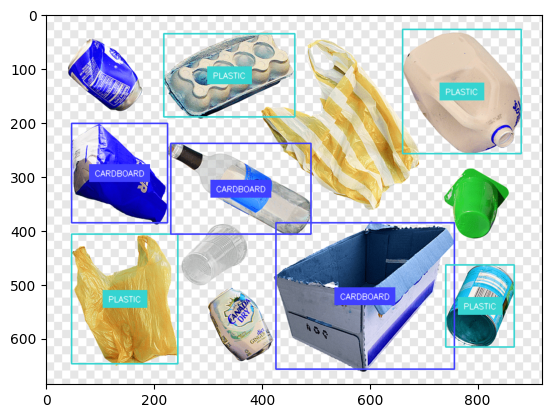

In [27]:
plt.imshow(annotated_frame)

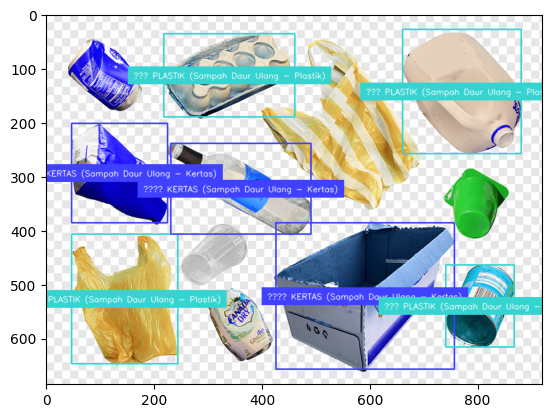

In [25]:
plt.imshow(annotated_frame)